# Tasa de éxito y población de equipos de futbol en EU
#### [Fernanda Borjas Orduño](https://www.linkedin.com/in/fernanda-borjas-ordu%C3%B1o-033067166/)

En esta parte se debe cargar un archivo con las regiones metropolitanas de Estados Unidos y los equipos deportivos asociados (está en data/wikipedia_data.html) y responder algunas preguntas sobre cada una de las regiones metropolitanas. Cada región puede tener uno o más equipos en la NFL (fútbol americano, data/nfl.csv), MLB (béisbol, data/mlb.csv), NBA (básquetbol, data/nba.csv) y NHL (hockey, data/nhl.csv). Las preguntas deben responderse con base en las regiones metropolitanas. Hay equipos, por ejemplo los “Oakland Raiders” que deben ser mapeados a la región metropolitana a la que pertenecen: “San Francisco Bay Area”.

### Objetivo 1
Considerando los datos de la NHL, generar una tabla que tenga las siguientes tres columnas: Región Metropolitana, Tasa, Población.

Primero es necesario cargar los paquetes que se utilizarán durante el ejercicio.

In [1]:
import numpy as np              #será necesaria para calcular el coeficiente de correlación, la media, mediana                
import pandas as pd             #se utilizará para manejar las bases de datos
from bs4 import BeautifulSoup   #se utilizará para el webscrapping, para obtener la base de datos de internet 
import requests                 #se utilizará también durante el webscrapping
import re                       #será necesaria para dividir los strings por mayúsculas
import locale                   #se utilizará para cambiar el formato de string a numérico de la población
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

De la página proporcionada para obtener la información sobre los equipos correspondientes a cada Área Metropolitana, se ubicó el URL de la página original para poder hacer webscrapping, es decir, descargar la base original directamente del [sitio de internet](https://en.wikipedia.org/wiki/List_of_American_and_Canadian_cities_by_number_of_major_professional_sports_franchises).

![image](Teams_area.png)

De dicha base, las columnas requeridas para completar el ejercicio son: Metropolitan area, Population, NFL, MLB, NBA y NHL. Es necesario hacer listas para cada una de estas características con el objetivo de guardar los datos provenientes del sitio en dichas listas. 

In [2]:
area = []
pais = []
poblacion = []
nfl = []
mlb = []
nba = []
nhl = []

El siguiente paso es hacer el webscrapping, para ello es necesario el URL de la página de la que se quiere descargar la base. El paquete "bs4" y "requests" permiten descargar el código HTML de la página web y buscar los objetos de clase "table" que contiene. Una vez identificada la tabla requerida, esta se guarda para poder extraer la información necesaria.

In [3]:
URL = 'https://en.wikipedia.org/wiki/List_of_American_and_Canadian_cities_by_number_of_major_professional_sports_franchises'
URL = BeautifulSoup(requests.get(URL).text, 'lxml')         #extraer el codigo HTML de la pagina web
Lista = URL.find_all('table', class_= 'wikitable sortable') #buscar los objetos de clase "table" en el codigo HTML
ad = [i.get_text() for i in Lista[0].find_all('td')]        #guardar la tabla requerida para extraer caracteristicas

Posteriormente, se itera sobre la tabla para ir llenando las listas con las caracterísitcas requeridas

In [4]:
for i in range(0, len(ad), 12):
    area.append(ad[i])
    pais.append(ad[i+1])
    poblacion.append(ad[i+3])
    nfl.append(ad[i+5])
    mlb.append(ad[i+6])
    nba.append(ad[i+7])
    nhl.append(ad[i+8])

Después se procede a crear una base de datos con las listas de las columnas elegidas. Esta base de datos servirá para poder asignar a cada equipo su Área Metropolitana correspondiente.

In [5]:
datos = pd.DataFrame()
datos['Area Metropolitana'] = pd.Series(area)
datos['Pais'] = pd.Series(pais)
datos['Poblacion'] = pd.Series(poblacion)
datos['nfl'] = pd.Series(nfl)
datos['mlb'] = pd.Series(mlb)
datos['nba'] = pd.Series(nba)
datos['nhl'] = pd.Series(nhl)
datos.head()

,Area Metropolitana,Pais,Poblacion,nfl,mlb,nba,nhl
0,New York City\n,United States\n,"20,153,634\n",GiantsJets[note 1]\n,YankeesMets[note 2]\n,KnicksNets\n,RangersIslandersDevils[note 3]\n
1,Los Angeles\n,United States\n,"13,310,447\n",RamsChargers[note 4]\n,DodgersAngels\n,LakersClippers\n,KingsDucks\n
2,Chicago\n,United States\n,"9,512,999\n",Bears[note 6]\n,CubsWhite Sox\n,Bulls[note 7]\n,Blackhawks\n
3,San Francisco Bay Area\n,United States\n,"6,657,982\n",49ers[note 8]\n,GiantsAthletics\n,Warriors\n,Sharks[note 9]\n
4,Dallas–Fort Worth\n,United States\n,"7,233,323\n",Cowboys\n,Rangers\n,Mavericks\n,Stars\n


Como puede observarse, hay caracteres en los datos de esta base que pueden resultar problemáticos a la hora de tratar con ellos, sin embargo, lidiaremos con eso más adelante. La columna "nhl" tiene los equipos que hay de esta liga en cada región, aunque la forma en que se encuentran es juntos en un mismo string. Se separará el string por letras mayúsuculas para obtener un string por cada equipo y así poder asignar a cada equipo de la base NHL su Área Metropolitana y Población correspondiente.

In [6]:
datos.to_csv('Datos_web.csv', index=False, encoding='utf-8-sig')

#### Datos NHL

Ahora, es necesario cargar la base de datos de la liga NHL para completar el ejercicio. Además, se deben hacer ciertos ajustes para poder utilizar esta base de datos correctamente, y deben filtrarse los datos únicamente de 2018 con el objetivo de obtener los datos solicitados en el ejercicio.

In [7]:
df_nhl = pd.read_csv('nhl.csv')           #se carga el archivo csv con los datos de NHL 
df_nhl = df_nhl[df_nhl['year'] == 2018]   #se filtran unicamente los datos de 2018
df_nhl.head()

,team,GP,W,L,OL,PTS,PTS%,GF,GA,SRS,SOS,RPt%,ROW,year,League
0,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,2018,NHL
1,Tampa Bay Lightning*,82,54,23,5,113,.689,296,236,0.66,-0.07,.634,48,2018,NHL
2,Boston Bruins*,82,50,20,12,112,.683,270,214,0.62,-0.07,.610,47,2018,NHL
3,Toronto Maple Leafs*,82,49,26,7,105,.640,277,232,0.49,-0.06,.567,42,2018,NHL
4,Florida Panthers,82,44,30,8,96,.585,248,246,-0.01,-0.04,.537,41,2018,NHL


Como puede observarse, es necesario remover algunos renglones que no tienen información útil para el ejercicio y que pueden complicar el manejo de los datos (como el renglón 0). Dichos renglones tienen la misma información en todas las columnas, por lo que si se conservan únicamente los que tienen diferente información en dos columnas cualesquiera (en este caso se seleccionó la columna "team" y la "W"), la base se queda únicamente con los datos que son útiles para el ejercicio.

In [8]:
df_nhl = df_nhl[df_nhl['W'] != df_nhl['team']]
df_nhl.head()

,team,GP,W,L,OL,PTS,PTS%,GF,GA,SRS,SOS,RPt%,ROW,year,League
1,Tampa Bay Lightning*,82,54,23,5,113,.689,296,236,0.66,-0.07,.634,48,2018,NHL
2,Boston Bruins*,82,50,20,12,112,.683,270,214,0.62,-0.07,.610,47,2018,NHL
3,Toronto Maple Leafs*,82,49,26,7,105,.640,277,232,0.49,-0.06,.567,42,2018,NHL
4,Florida Panthers,82,44,30,8,96,.585,248,246,-0.01,-0.04,.537,41,2018,NHL
5,Detroit Red Wings,82,30,39,13,73,.445,217,255,-0.48,-0.01,.341,25,2018,NHL


Posteriormente, se procede a calcular la tasa de juegos ganados de acuerdo a la siguiente fórmula: $$Tasa = \dfrac{W}{W+L}$$
Y se mantienen únicamente las columnas "team" y "Tasa" ya que son las únicas que se neesitan para completar el ejercicio.

In [9]:
df_nhl['W'] = pd.to_numeric(df_nhl['W'])                  #convertir a un vector numerico la columna W
df_nhl['L'] = pd.to_numeric(df_nhl['L'])                  #convertir a un vector numerico la columna L
df_nhl['Tasa'] = df_nhl['W']/(df_nhl['W']+df_nhl['L'])    #calcular la tasa
df_nhl = df_nhl[['team', 'Tasa']]                         #mantener unicamente las columnas "team" y "Tasa"
df_nhl.head()

,team,Tasa
1,Tampa Bay Lightning*,0.701299
2,Boston Bruins*,0.714286
3,Toronto Maple Leafs*,0.653333
4,Florida Panthers,0.594595
5,Detroit Red Wings,0.434783


#### Datos de área y población

Para poder asignar el Área Metropolitana a cada equipo, se conservan únicamente las columnas necesarias, que son "Area Metropolitana", "Poblacion" y "nhl". Además, es necesario darle cierto tratamiento a los datos para evitar que generen errores durante su manejo.

In [10]:
area_nhl = datos[['Area Metropolitana', 'Poblacion', 'nhl']]      #conservar las columnas de interes
area_nhl = area_nhl[area_nhl['nhl'] != '—\n']                     #eliminar signos de puntuacion innecesarios
area_nhl = area_nhl[area_nhl['Area Metropolitana']!= 'Totals\n']  #eliminar el renglon final 
area_nhl.head()

,Area Metropolitana,Poblacion,nhl
0,New York City\n,"20,153,634\n",RangersIslandersDevils[note 3]\n
1,Los Angeles\n,"13,310,447\n",KingsDucks\n
2,Chicago\n,"9,512,999\n",Blackhawks\n
3,San Francisco Bay Area\n,"6,657,982\n",Sharks[note 9]\n
4,Dallas–Fort Worth\n,"7,233,323\n",Stars\n


#### Base de datos de NHL, área y población

Para crear la base de datos requerida, es necesario conjuntar la información de los datos de NHL y los de área y población con el objetivo de asignar a cada equipo su Área correspondiente y calcular la tasa promedio de los equipos de cada área.

In [11]:
#crear dataframe con la estructura requerida
semifinal_nhl = pd.DataFrame([], columns = ['Area Metropolitana', 'Equipo', 'Poblacion', 'Tasa'])

areas = list(area_nhl['Area Metropolitana'])    #lista para obtener las areas de la base web
equipos_tasas = list(df_nhl['team'])            #lista de los equipos de la base NHL

for area in areas:
    #obtener el nombre del area sin caracteres innecesarios
    area_met = area.split('\n')[0]
    
    #obtener el valor de la poblacion correspondiente al area
    pob = area_nhl['Poblacion'][area_nhl['Area Metropolitana'] == area].values[0]  #valor de la poblacion
    pob = pob.split('\n')[0]                                                       #quitar caracteres innecesarios
    pob = locale.atoi(pob)                                                         #transformar formato de numero con comas a enteros
    
    #obtener el equipo de la base de NHL para asignarle su area y poblacion correspondiente
    equipo = area_nhl['nhl'][area_nhl['Area Metropolitana'] == area].values[0]     #nombre equipo
    equipo = equipo.split('\n')[0]                                                 #quitar caracteres innecesarios
    equipo = equipo.split('[')[0]
    equipo = re.findall('.[^A-Z]*', equipo)                                        #dividir por mayusculas el string
    
    #algunas areas tienen mas de 1 equipo, por lo que se debe revisar cada equipo del string separado por mayusculas
    if len(equipo) > 0:
        for eq in equipo:
            if not eq[-1] == ' ':
                for eq_tasa in equipos_tasas:
                    if (eq in eq_tasa) == True:
                        tasa = df_nhl['Tasa'][df_nhl['team']== eq_tasa].values[0]
                        #se llena la base semifinal con los datos del area, equipo, poblacion y tasa
                        semifinal_nhl = semifinal_nhl.append({'Area Metropolitana':area_met, 'Equipo':eq_tasa, 'Poblacion':pob, 'Tasa':tasa}, ignore_index=True)

                

#### Base final

Finalmente se agrupan las áreas para obtener un promedio de las tasas de los equipos, y la base resultante tiene las características solicitadas para el ejercicio, con las columnas Área Metropolitana, Población y Tasa promedio por región. La base resultante tiene 28 renglones y 3 columnas.

In [12]:
final_nhl = semifinal_nhl.groupby(['Area Metropolitana', 'Poblacion'], as_index = False)['Tasa'].mean()
final_nhl.head()

,Area Metropolitana,Poblacion,Tasa
0,Boston,4794447,0.714286
1,Buffalo,1132804,0.357143
2,Calgary,1392609,0.513889
3,Chicago,9512999,0.458333
4,Columbus,2041520,0.600000


In [13]:
dim = final_nhl.shape #dimensiones de la base final
print('La base de datos final contiene: ' + str(dim[0]) + ' filas y ' + str(dim[1]) + ' columnas.')

La base de datos final contiene: 28 filas y 3 columnas.


In [14]:
final_nhl.to_csv('NHL_datos_completos.csv', index=False, encoding='utf-8-sig')

### Objetivo 2

Generar visualizaciones gráficas con los datos de la tabla que se obtuvo en el inciso anterior, para la NHL.

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt

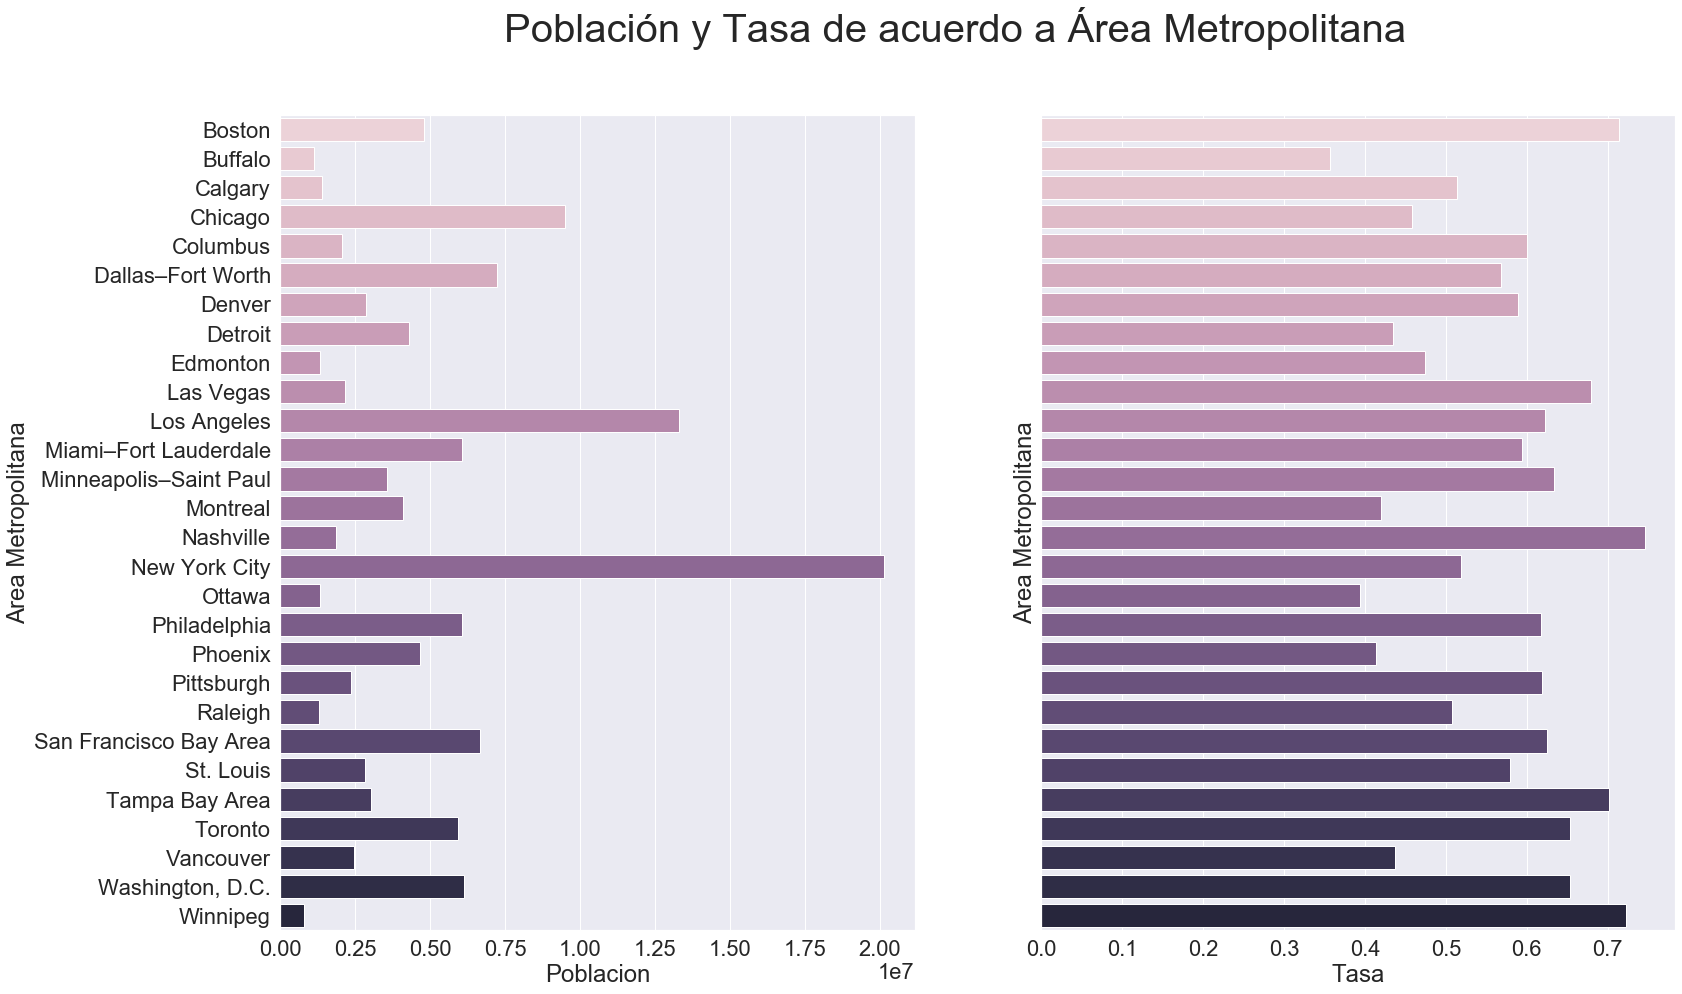

In [16]:
sns.set(font_scale = 2)
fig, axes = plt.subplots(1, 2, figsize=(25, 15), sharey=True)
fig.suptitle('Población y Tasa de acuerdo a Área Metropolitana', fontsize=40)
sns.barplot(x="Poblacion", y="Area Metropolitana", data=final_nhl, ax=axes[0], palette="ch:s=-.2")
sns.barplot(x="Tasa", y="Area Metropolitana",data=final_nhl, ax=axes[1], palette="ch:s=-.2")
plt.savefig('NHL_Barplot_Población_Tasa.png', dpi=300)

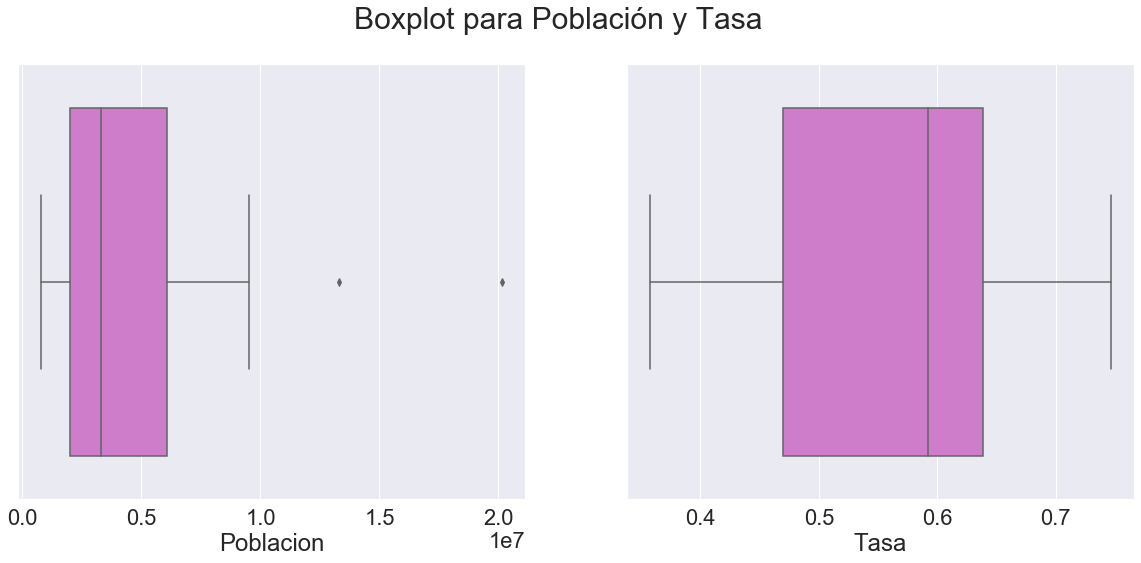

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle('Boxplot para Población y Tasa', fontsize=30)
sns.boxplot(x=final_nhl['Poblacion'], ax=axes[0], color="orchid")
sns.boxplot(x=final_nhl['Tasa'], ax=axes[1], color="orchid")
plt.savefig('NHL_Boxplot_Población_Tasa.png', dpi=300)

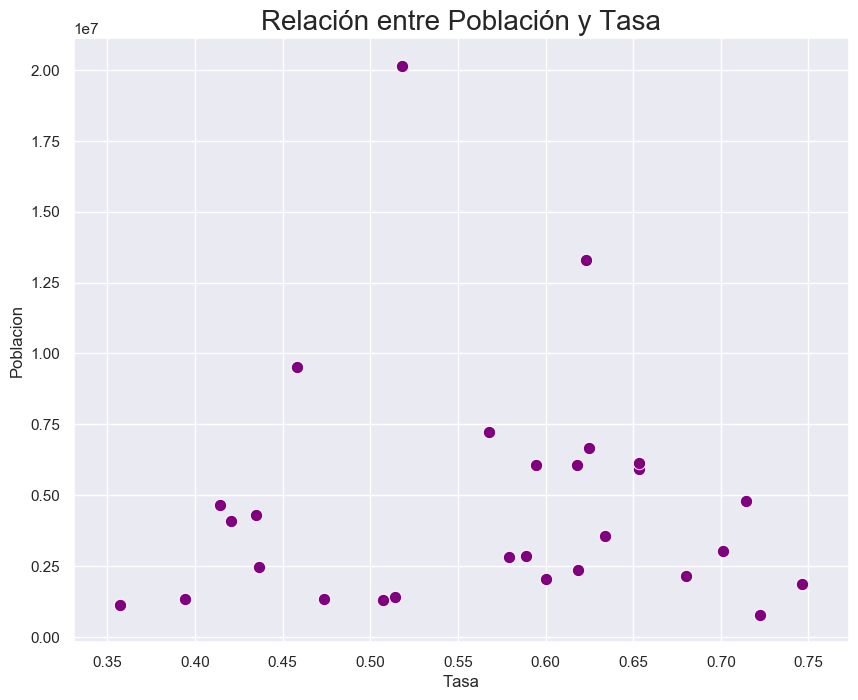

In [18]:
sns.set(font_scale = 1)
plt.rcParams['figure.figsize'] = [10,8]
plt.rcParams['figure.dpi'] = 100
sns.scatterplot(x="Tasa", y="Poblacion", data=final_nhl, s=80, color="purple")
plt.title('Relación entre Población y Tasa', fontsize=20)
plt.savefig('NHL_Scatter_Población_Tasa.png', dpi=300)

### Objetivo 3

Calcular el promedio, la mediana y el rango intercuartil para cada una de las columnas Tasa y Población. Calcular la correlación entre Tasa y Población, para la NHL.

In [19]:
final_nhl.describe()

,Poblacion,Tasa
count,2.800000e+01,28.000000
mean,4.617192e+06,0.565982
std,4.175085e+06,0.109680
min,7.784890e+05,0.357143
25%,1.997464e+06,0.469846
50%,3.291604e+06,0.591818
75%,6.067415e+06,0.638685
max,2.015363e+07,0.746479


**Cálculo de las medias**

In [20]:
print('La media para la Población es: '+ str(final_nhl['Poblacion'].mean()))

La media para la Población es: 4617191.857142857


In [21]:
print('La media para la Tasa es: '+ str(final_nhl['Tasa'].mean()))

La media para la Tasa es: 0.5659823365666096


**Cálculo de medianas**

In [22]:
print('La mediana para la Población es: '+ str(final_nhl['Poblacion'].median()))

La mediana para la Población es: 3291603.5


In [23]:
print('La mediana para la Tasa es: '+ str(final_nhl['Tasa'].median()))

La mediana para la Tasa es: 0.5918178452425028


**Cálculo del rango intercuartil**

In [24]:
rango_pob = final_nhl['Poblacion'].quantile(0.75) - final_nhl['Poblacion'].quantile(0.25)
print('El rango intercuartil para la Población es: '+ str(rango_pob))

El rango intercuartil para la Población es: 4069950.75


In [25]:
rango_tasa = final_nhl['Tasa'].quantile(0.75) - final_nhl['Tasa'].quantile(0.25)
print('El rango intercuartil para la Tasa es: '+ str(rango_tasa))

El rango intercuartil para la Tasa es: 0.16883895478131955


**Coeficiente de correlación entre Tasa y Población**

In [26]:
corr = np.corrcoef(final_nhl['Poblacion'].values, final_nhl['Tasa'].values)[0,1]
print('El coeficiente de correlación entre la Tasa y la Población es: ' + str(corr))

El coeficiente de correlación entre la Tasa y la Población es: 0.012486162921209909


### Objetivo 4
Replicar lo anterior para todas las ligas (nfl, nhl, nba y mlb).

Dado que la forma en que se realizó el manejo de datos fue muy robusta, esto permite crear una función para replicar el análisis usando diferentes ligas. Se procedió a realizar una función usando el mismo código que se mostró a lo largo del Notebook haciéndole ligeras modificaciones. Esta función recibe como entrada el nombre de la liga (nfl, nhl, nba o mlb) e imprime las gráficas y datos requeridos en el ejercicio.

In [27]:
def infoporliga(liga='nhl'):
    if liga not in ['nfl','nhl','mlb','nba']:
        print('Ingrese una liga correcta, las ligas son: nfl, nhl, nba, mlb.')
    else:
        df_liga = pd.read_csv(liga+'.csv')
        df_liga = df_liga[df_liga['year'] == 2018]
        df_liga = df_liga[df_liga['W'] != df_liga['team']]
        df_liga['W'] = pd.to_numeric(df_liga['W'])                  #convertir a un vector numerico la columna W
        df_liga['L'] = pd.to_numeric(df_liga['L'])                  #convertir a un vector numerico la columna L
        df_liga['Tasa'] = df_liga['W']/(df_liga['W']+df_liga['L'])    #calcular la tasa
        df_liga = df_liga[['team', 'Tasa']] 
        area_liga = datos[['Area Metropolitana', 'Poblacion', liga]]      #conservar las columnas de interes
        area_liga = area_liga[area_liga[liga] != '—\n']                     #eliminar signos de puntuacion innecesarios
        area_liga = area_liga[area_liga['Area Metropolitana']!= 'Totals\n']  #eliminar el renglon final
        
        #crear dataframe con la estructura requerida
        semifinal_liga = pd.DataFrame([], columns = ['Area Metropolitana', 'Equipo', 'Poblacion', 'Tasa'])

        areas = list(area_liga['Area Metropolitana'])    #lista para obtener las areas de la base web
        equipos_tasas = list(df_liga['team'])            #lista de los equipos de la base de la liga

        for area in areas:
            #obtener el nombre del area sin caracteres innecesarios
            area_met = area.split('\n')[0]

            #obtener el valor de la poblacion correspondiente al area
            pob = area_liga['Poblacion'][area_liga['Area Metropolitana'] == area].values[0]  #valor de la poblacion
            pob = pob.split('\n')[0]                                                       #quitar caracteres innecesarios
            pob = locale.atoi(pob)                                                         #transformar formato de numero con comas a enteros

            #obtener el equipo de la base de NHL para asignarle su area y poblacion correspondiente
            equipo = area_liga[liga][area_liga['Area Metropolitana'] == area].values[0]     #nombre equipo
            equipo = equipo.split('\n')[0]                                                 #quitar caracteres innecesarios
            equipo = equipo.split('[')[0]
            equipo = re.findall('.[^A-Z]*', equipo)                                        #dividir por mayusculas el string

            #algunas areas tienen mas de 1 equipo, por lo que se debe revisar cada equipo del string separado por mayusculas
            if len(equipo) > 0:
                for eq in equipo:
                    if not eq[-1] == ' ':
                        for eq_tasa in equipos_tasas:
                            if (eq in eq_tasa) == True:
                                tasa = df_liga['Tasa'][df_liga['team']== eq_tasa].values[0]
                                #se llena la base semifinal con los datos del area, equipo, poblacion y tasa
                                semifinal_liga = semifinal_liga.append({'Area Metropolitana':area_met, 'Equipo':eq_tasa, 'Poblacion':pob, 'Tasa':tasa}, ignore_index=True)
        
        
        final_liga = semifinal_liga.groupby(['Area Metropolitana', 'Poblacion'], as_index = False)['Tasa'].mean()          
        dim = final_liga.shape #dimensiones de la base final
        print('La base de datos final para '+liga.upper()+ ' contiene: ' + str(dim[0]) + ' filas y ' + str(dim[1]) + ' columnas. \n')
        final_liga.to_csv(liga.upper() + '_datos_completos.csv', index=False, encoding='utf-8-sig')
        
        ### barplot
        sns.set(font_scale = 2)
        fig, axes = plt.subplots(1, 2, figsize=(25, 15), sharey=True)
        fig.suptitle('Población y Tasa de acuerdo a Área Metropolitana para '+liga.upper(), fontsize=40)
        sns.barplot(x="Poblacion", y="Area Metropolitana", data=final_liga, ax=axes[0], palette="ch:s=-.2")
        sns.barplot(x="Tasa", y="Area Metropolitana",data=final_liga, ax=axes[1], palette="ch:s=-.2")
        plt.savefig(liga.upper()+'_Barplot_Población_Tasa.png', dpi=300)
        ### boxplot
        fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
        fig.suptitle('Boxplot para Población y Tasa para '+liga.upper(), fontsize=30)
        sns.boxplot(x=final_liga['Poblacion'], ax=axes[0], color="orchid")
        sns.boxplot(x=final_liga['Tasa'], ax=axes[1], color="orchid")
        plt.savefig(liga.upper()+'_Boxplot_Población_Tasa.png', dpi=300)
        ### sacatterplot
        plt.figure()
        sns.set(font_scale = 1)
        plt.rcParams['figure.figsize'] = [10,8]
        plt.rcParams['figure.dpi'] = 100
        sns.scatterplot(x="Tasa", y="Poblacion", data=final_liga, s=80, color="purple")
        plt.title('Relación entre Población y Tasa para '+liga.upper(), fontsize=20)
        plt.savefig(liga.upper()+'_Scatter_Población_Tasa.png', dpi=300)
        
        print('Las estadisticas de las variables Población y Tasa para el dataframe de '+liga.upper())
        print(final_liga.describe())
        
        print('\n La media para la Población es: '+ str(final_liga['Poblacion'].mean()))
        
        print('\n La media para la Tasa es: '+ str(final_liga['Tasa'].mean()))
        
        print('\n La mediana para la Población es: '+ str(final_liga['Poblacion'].median()))
        
        print('\n La mediana para la Tasa es: '+ str(final_liga['Tasa'].median()))
        
        rango_pob = final_liga['Poblacion'].quantile(0.75) - final_liga['Poblacion'].quantile(0.25)
        print('\n El rango intercuartil para la Población es: '+ str(rango_pob))
        
        rango_tasa = final_liga['Tasa'].quantile(0.75) - final_liga['Tasa'].quantile(0.25)
        print('\n El rango intercuartil para la Tasa es: '+ str(rango_tasa))
        
        corr = np.corrcoef(final_liga['Poblacion'].values, final_liga['Tasa'].values)[0,1]
        print('\n El coeficiente de correlación entre la Tasa y la Población es: ' + str(corr))

In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

**Para NBA**

La base de datos final para NBA contiene: 28 filas y 3 columnas. 

Las estadisticas de las variables Población y Tasa para el dataframe de NBA
          Poblacion       Tasa
count  2.800000e+01  28.000000
mean   4.880542e+06   0.506533
std    4.126744e+06   0.150945
min    1.186187e+06   0.256098
25%    2.236216e+06   0.342988
50%    3.924326e+06   0.548780
75%    6.085869e+06   0.588415
max    2.015363e+07   0.792683

 La media para la Población es: 4880541.892857143

 La media para la Tasa es: 0.5065331010452961

 La mediana para la Población es: 3924326.5

 La mediana para la Tasa es: 0.5487804878048781

 El rango intercuartil para la Población es: 3849652.75

 El rango intercuartil para la Tasa es: 0.24542682926829268

 El coeficiente de correlación entre la Tasa y la Población es: -0.17657160252844617


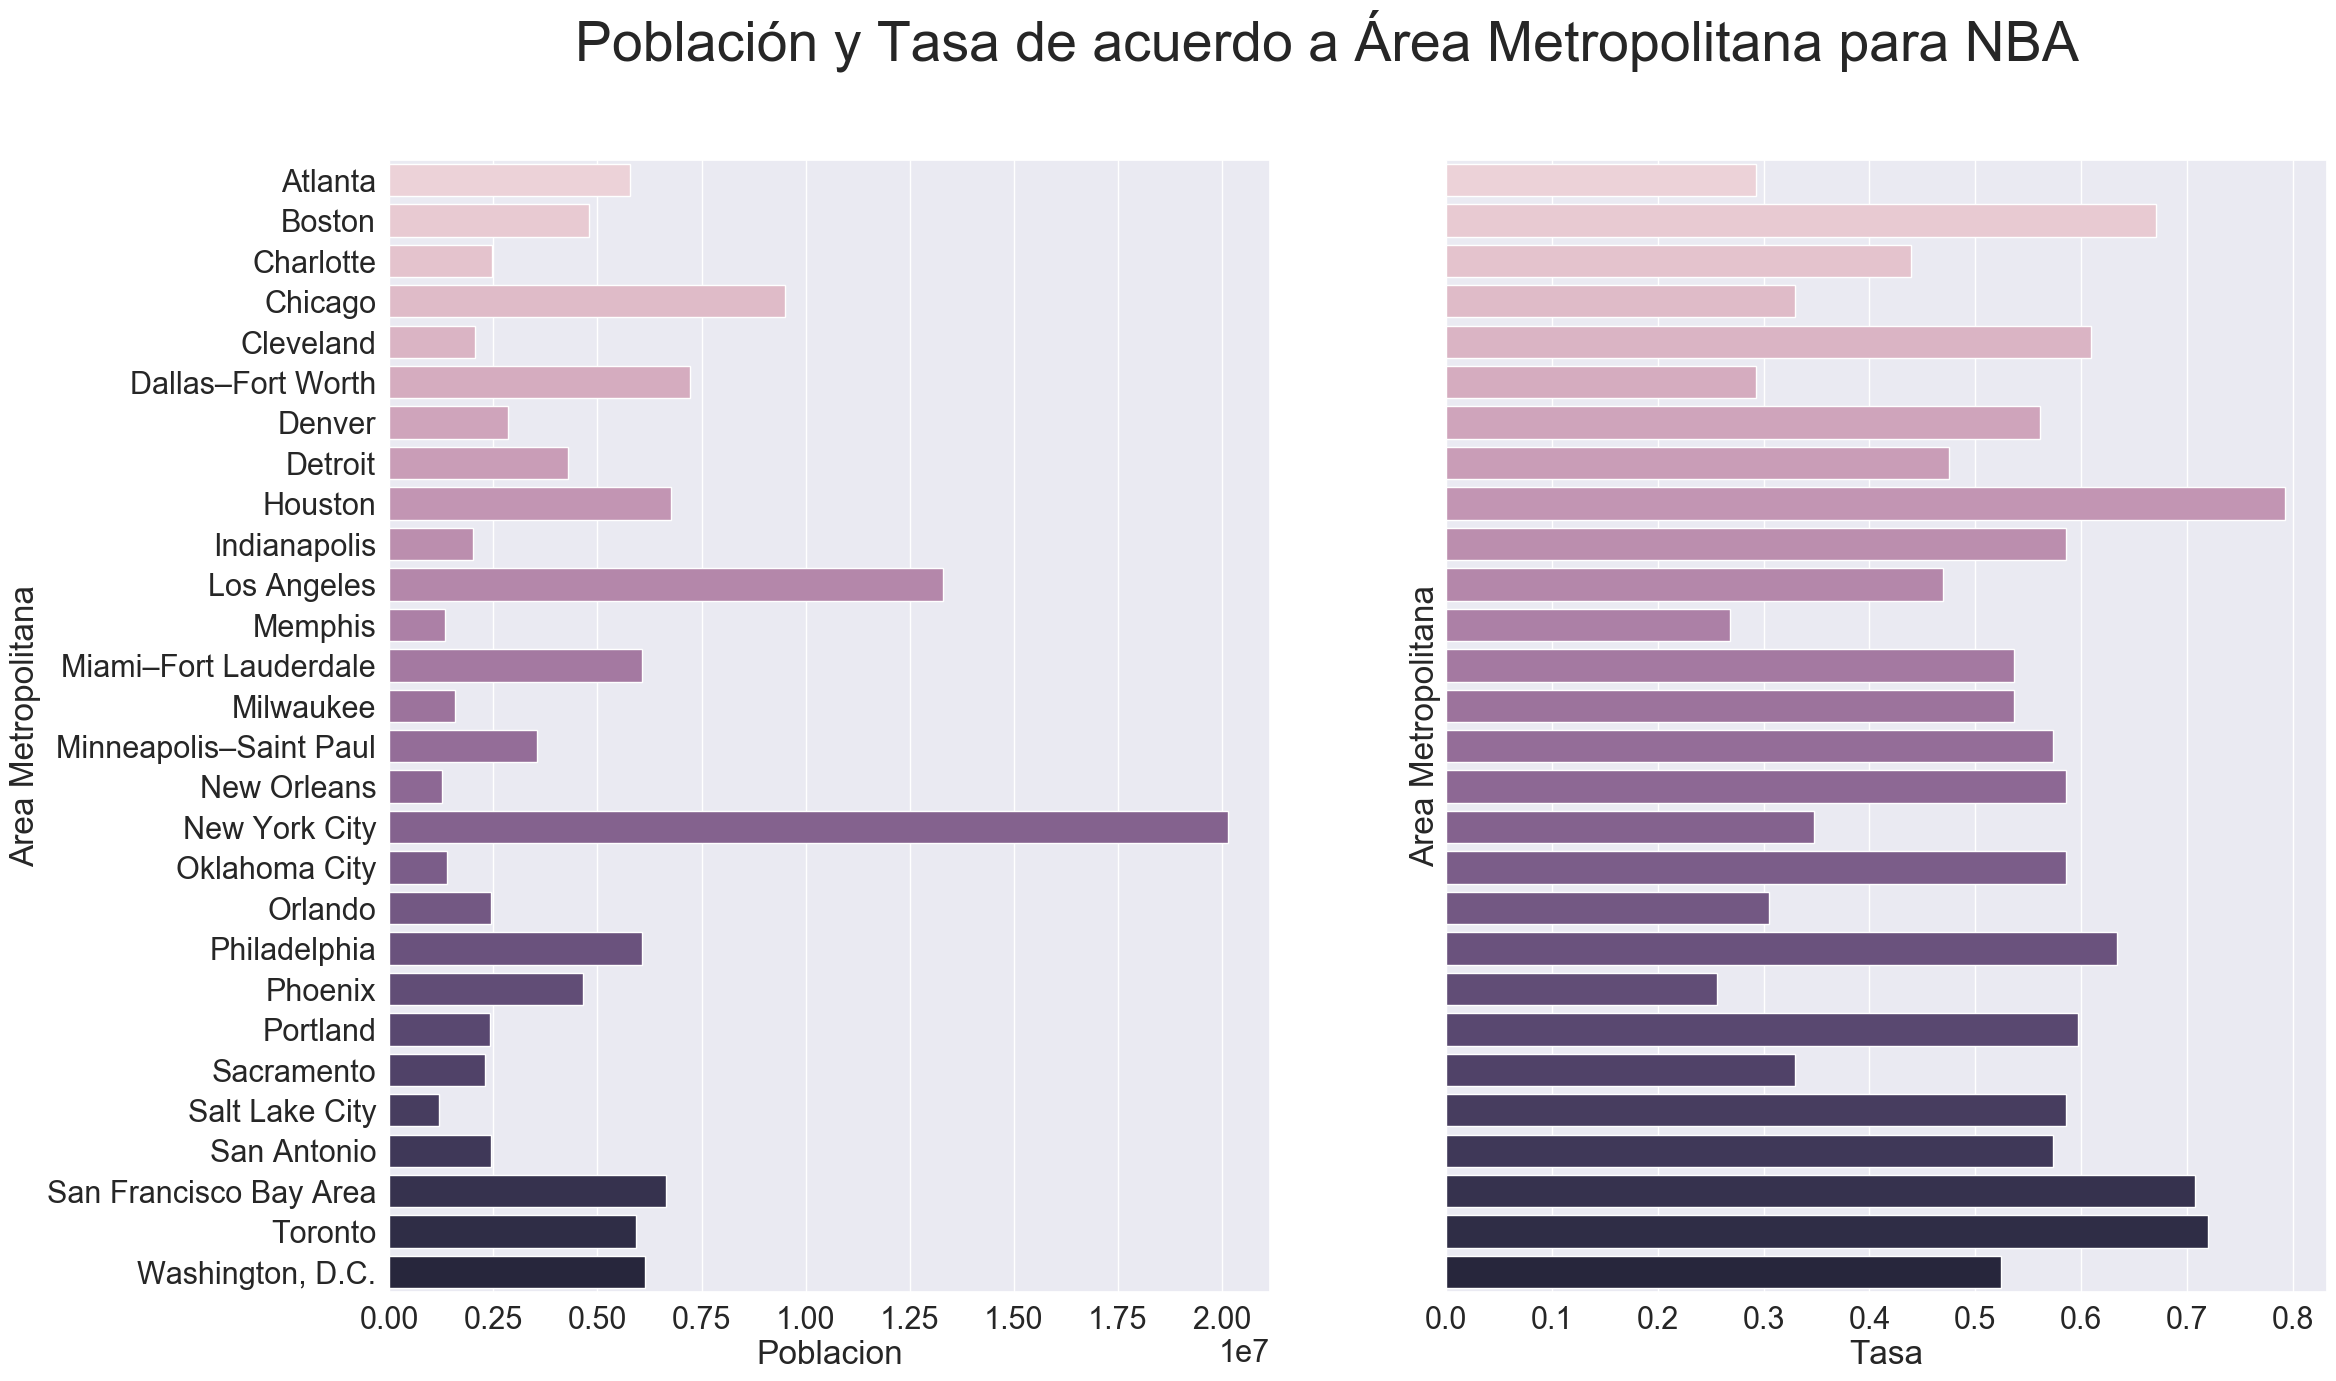

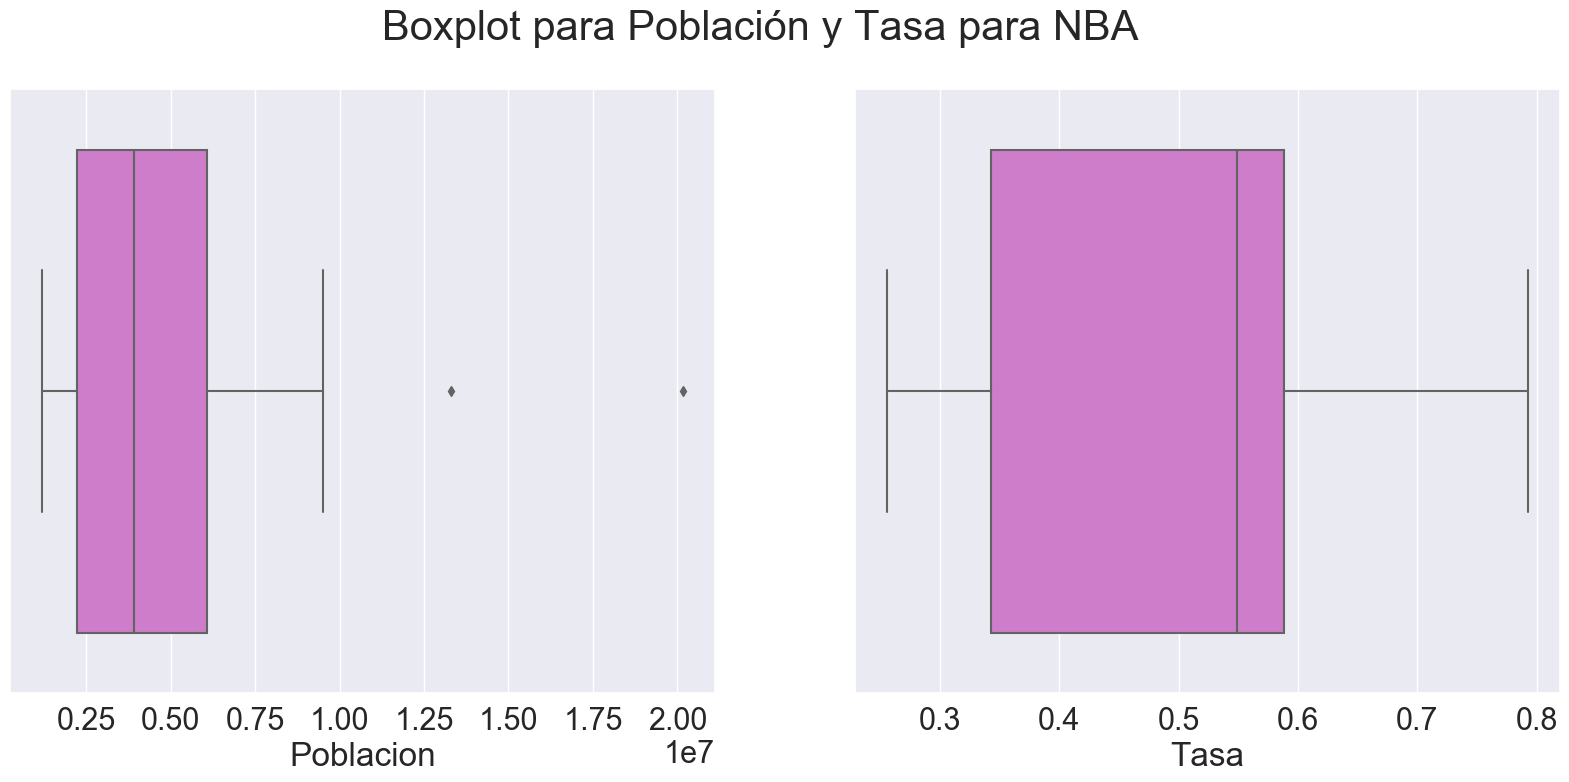

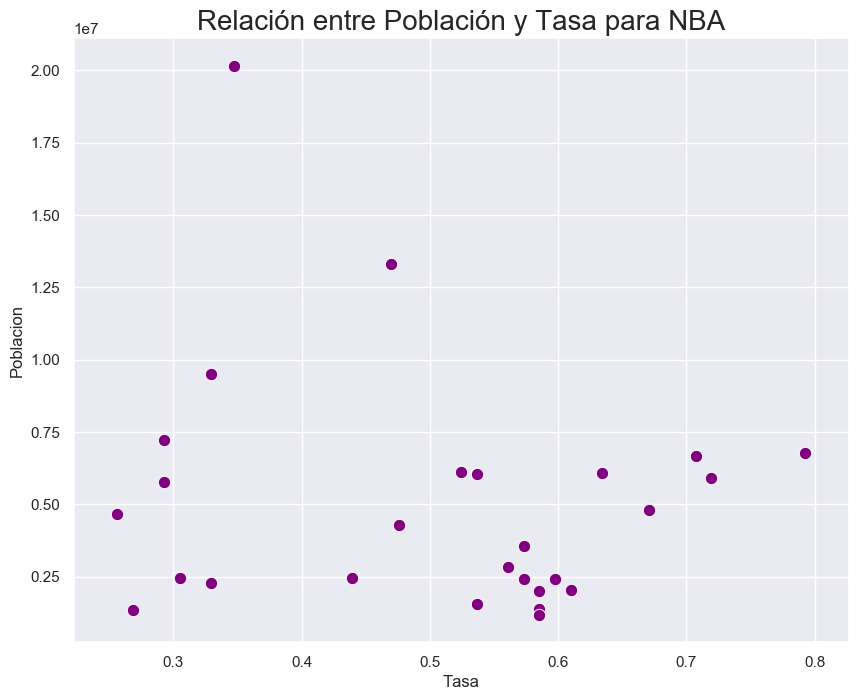

In [29]:
infoporliga('nba')

**Para MLB**

La base de datos final para MLB contiene: 26 filas y 3 columnas. 

Las estadisticas de las variables Población y Tasa para el dataframe de MLB
          Poblacion       Tasa
count  2.600000e+01  26.000000
mean   5.376151e+06   0.493616
std    4.001856e+06   0.080662
min    1.572482e+06   0.290123
25%    2.818521e+06   0.422840
50%    4.479577e+06   0.517004
75%    6.116608e+06   0.548611
max    2.015363e+07   0.635802

 La media para la Población es: 5376150.923076923

 La media para la Tasa es: 0.49361591466523147

 La mediana para la Población es: 4479577.0

 La mediana para la Tasa es: 0.5170040641055134

 El rango intercuartil para la Población es: 3298087.0

 El rango intercuartil para la Tasa es: 0.12577160493827166

 El coeficiente de correlación entre la Tasa y la Población es: 0.20362951733281018


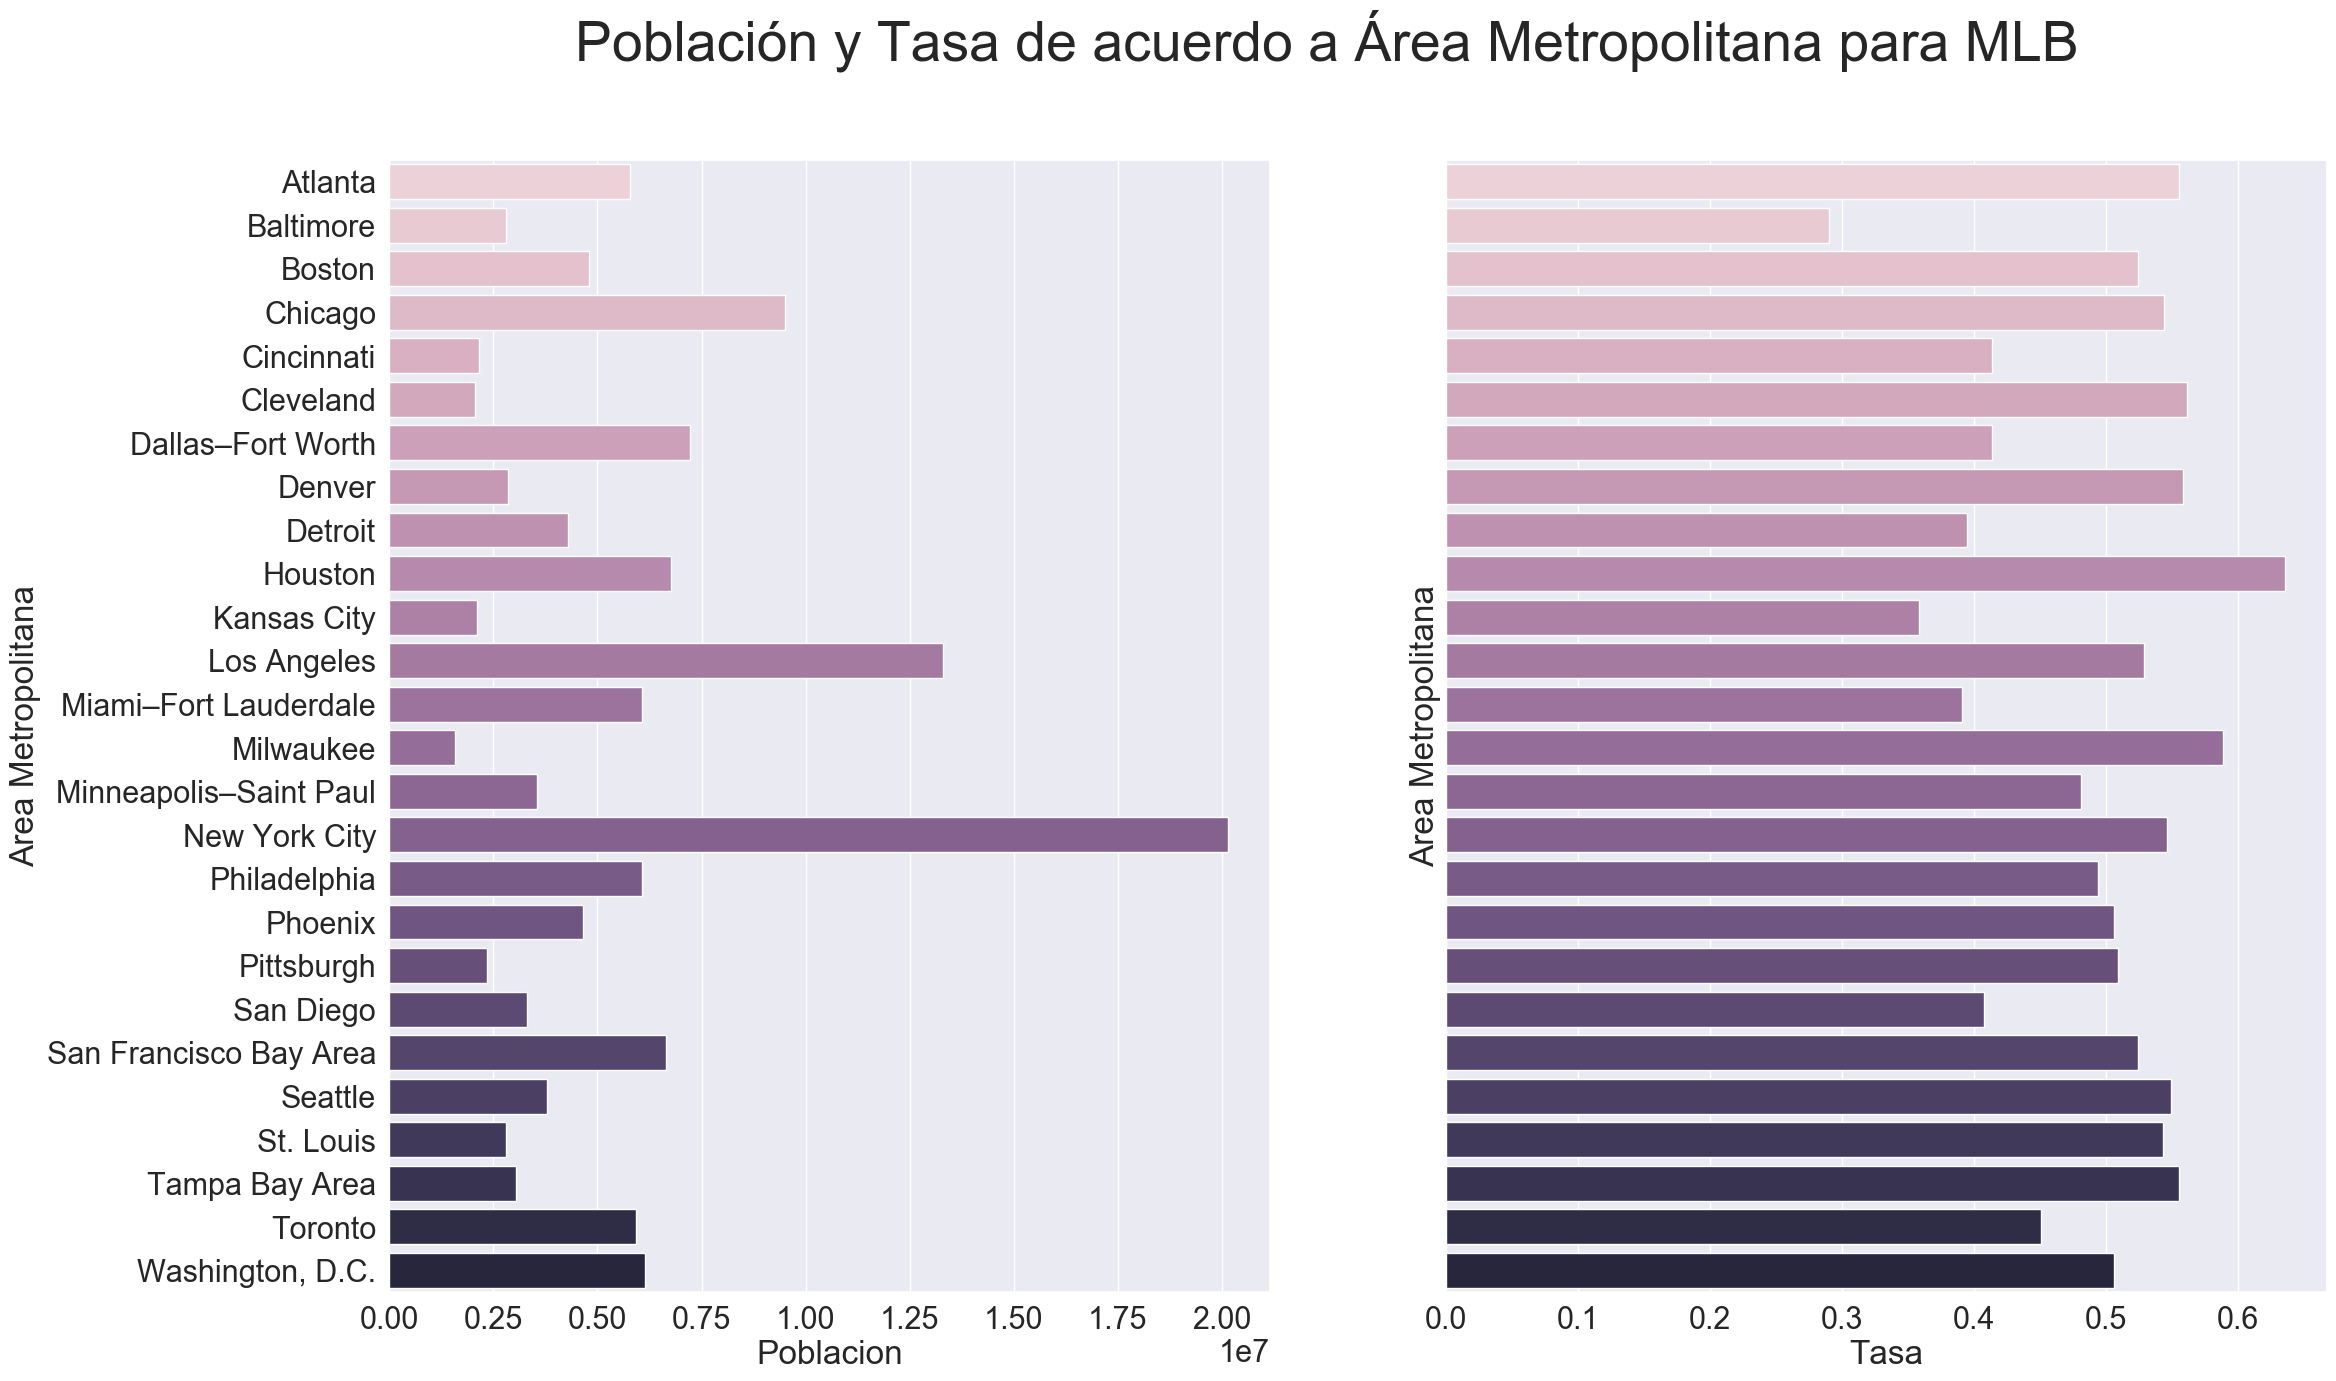

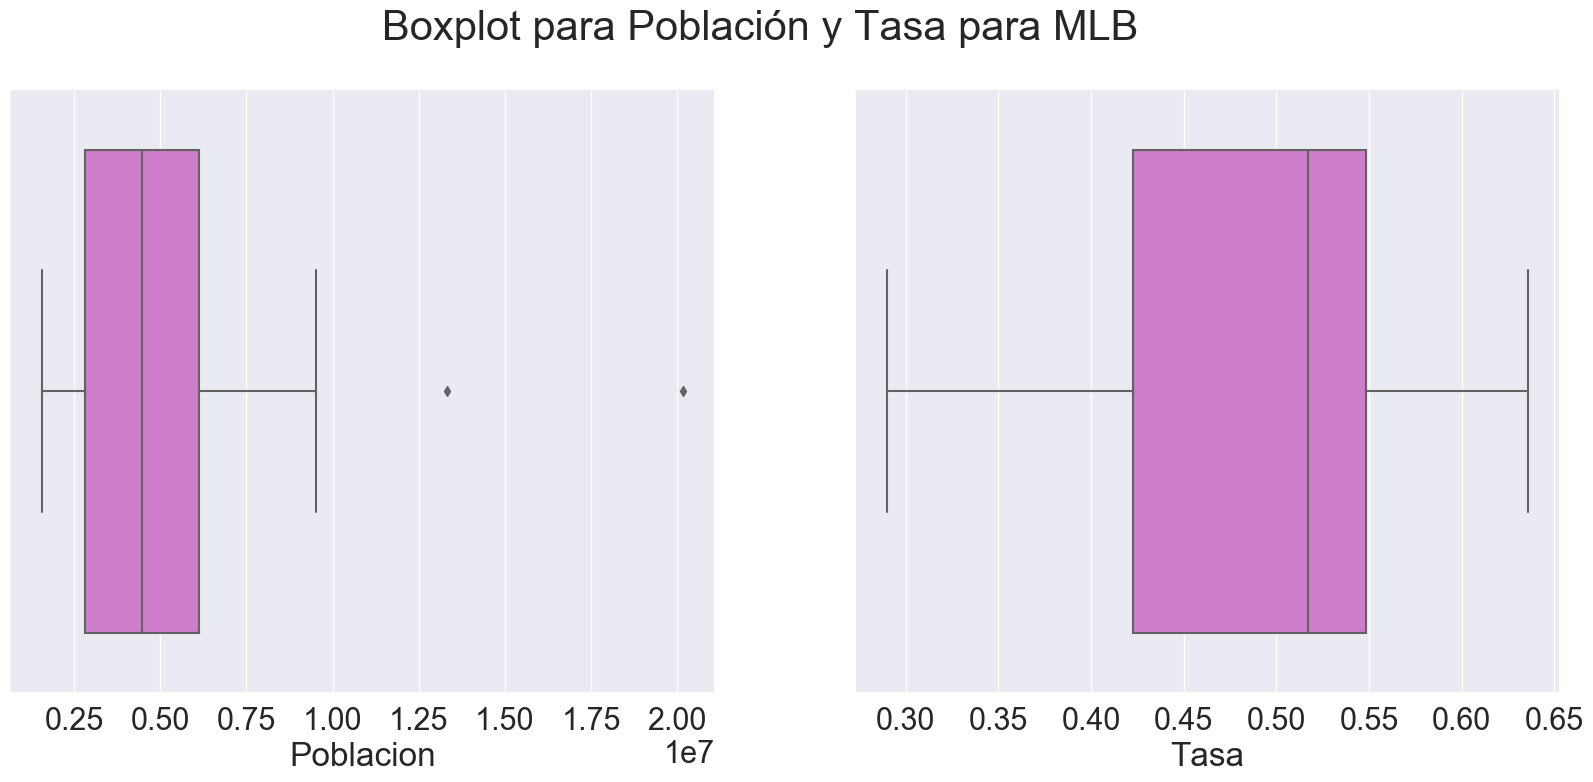

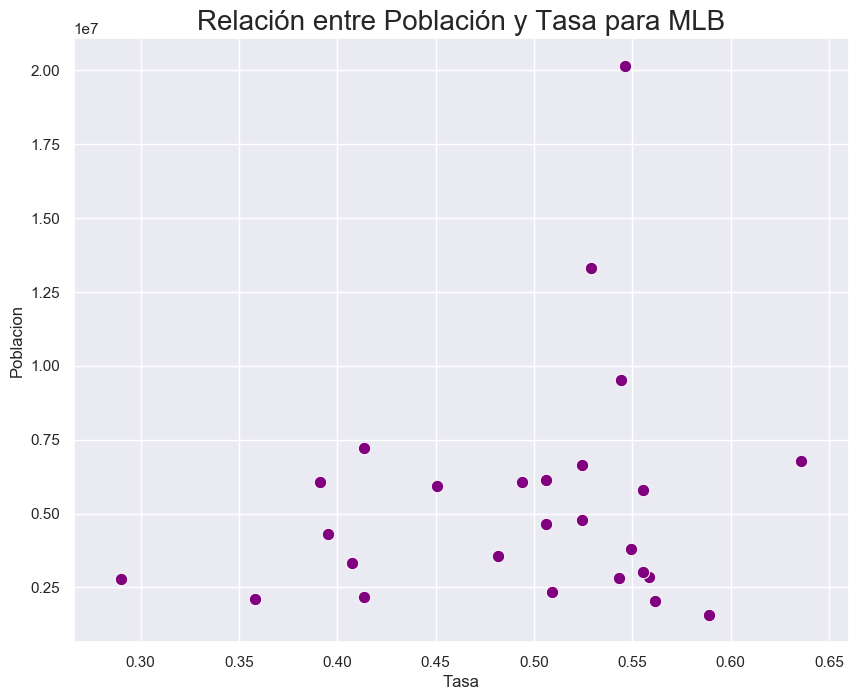

In [30]:
infoporliga('mlb')

**Para NFL**

La base de datos final para NFL contiene: 29 filas y 3 columnas. 

Las estadisticas de las variables Población y Tasa para el dataframe de NFL
          Poblacion       Tasa
count  2.900000e+01  29.000000
mean   4.576563e+06   0.500000
std    4.113520e+06   0.177245
min    3.182360e+05   0.187500
25%    2.104509e+06   0.375000
50%    3.032171e+06   0.466667
75%    6.066387e+06   0.625000
max    2.015363e+07   0.812500

 La media para la Población es: 4576562.586206896

 La media para la Tasa es: 0.5

 La mediana para la Población es: 3032171.0

 La mediana para la Tasa es: 0.4666666666666667

 El rango intercuartil para la Población es: 3961878.0

 El rango intercuartil para la Tasa es: 0.25

 El coeficiente de correlación entre la Tasa y la Población es: 0.040399329749847265


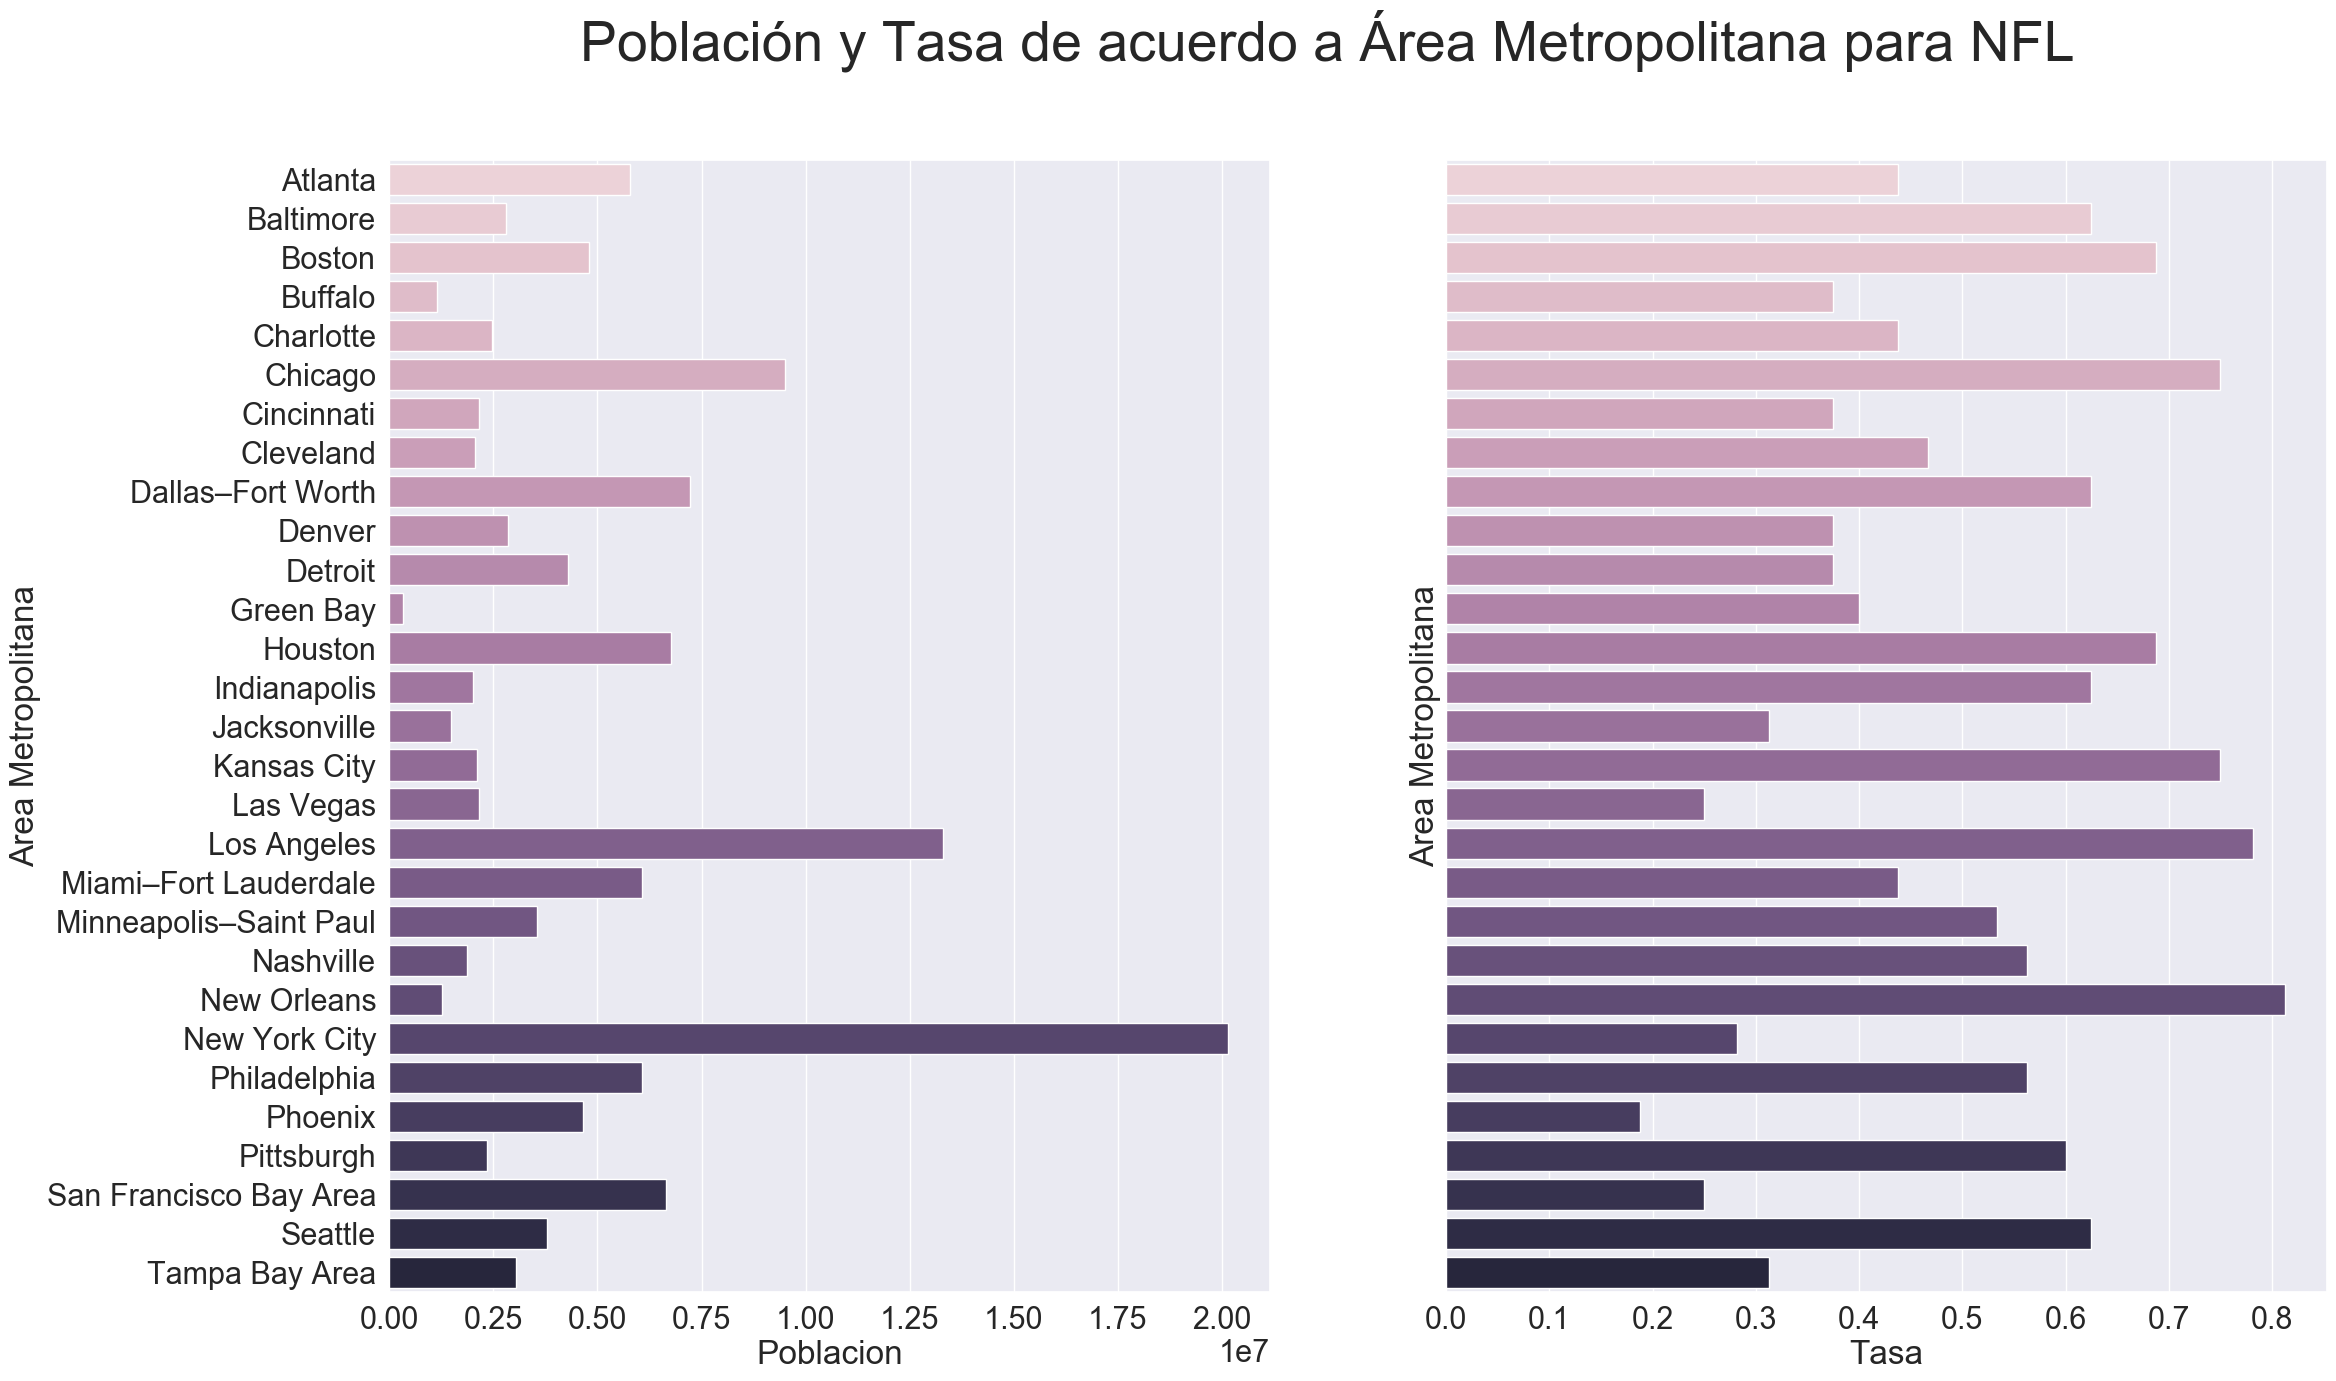

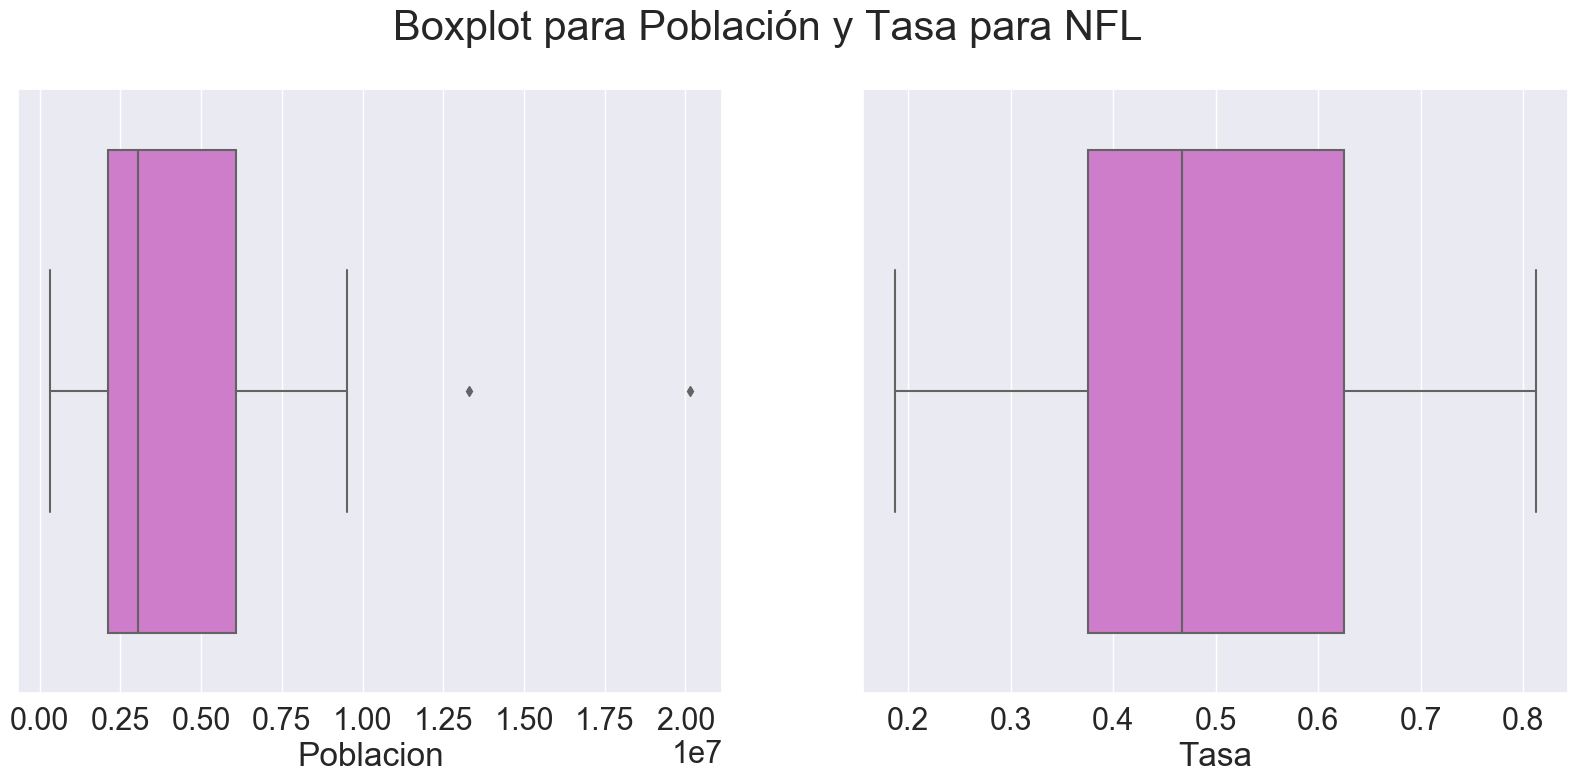

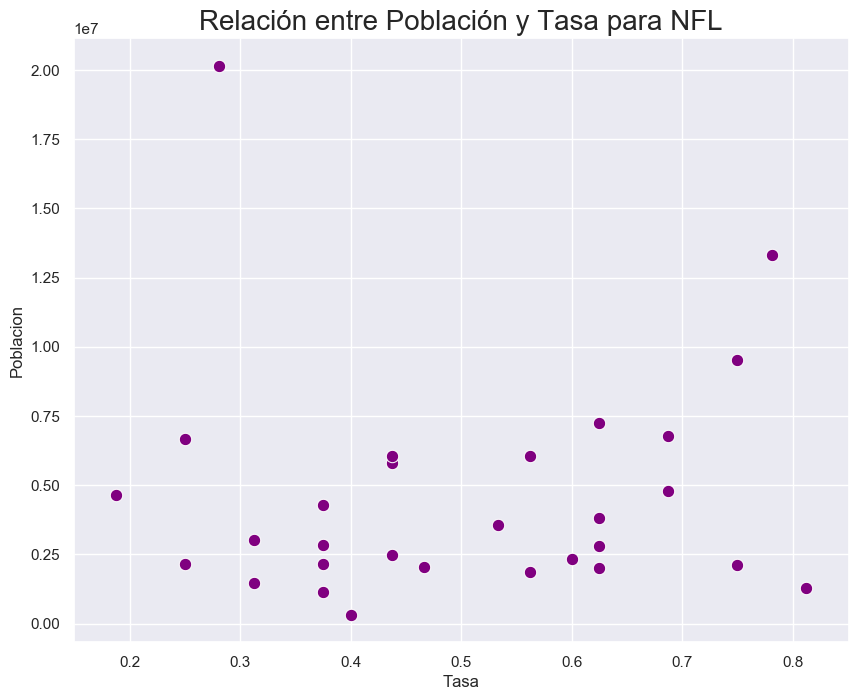

In [31]:
infoporliga('nfl')